<a href="https://colab.research.google.com/github/williammcintosh/machine_learning_projects/blob/main/911_Calls_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 911 Calls Data Exploration

Author: Will McIntosh

# Abstract

The main goal of this project is to get more familiar with tools required in data exploration.

---
# Import

Here we import the necessary libraries to make the notebook functional.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

---
# Dataset

Downloading the dataset from this Kaggle source called [Monterey Counter Alert](https://www.kaggle.com/mchirico/montcoalert).

In [10]:
#Get the Datasets
!pip install opendatasets --upgrade --quiet
dataset_url = 'https://www.kaggle.com/mchirico/montcoalert' 
import opendatasets as od
od.download(dataset_url)
df=pd.read_csv("montcoalert/911.csv")

Skipping, found downloaded files in "./montcoalert" (use force=True to force download)


---
# Examine Dataset

Notice this dataset has 9 columns (the last one isn't very useful) and 663k rows.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [12]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


---
# Get Prominent Data

## • Top 5 Zip Codes

`value_counts` is a Pandas method that [returns a Series containing counts of unique values](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html).

In [13]:
df['zip'].value_counts().head()

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

## • Top 5 Townships

In [14]:
df['twp'].value_counts().head()

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

## • Number of Unique Title Codes

`nunique` is a Pandas method that [counts number of distinct elements in specified axis](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html).

In [17]:
uniqueTitles = df['title'].nunique()
print("There are {} unique titles.".format(uniqueTitles))

There are 148 unique titles.


---
# Create New Columns

## • Create Reason Codes Column

`iloc` is a Pandas method that [is a purely integer-location based indexing for selection by position](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html).

In [16]:
# First we need to look at what a title code looks like
x = df['title'].iloc[0]
x

'EMS: BACK PAINS/INJURY'

In [18]:
# Let's split the example on the colon,
# then grab just the first index value
x.split(':')[0]

'EMS'

In [21]:
# Now we know how to split it for all titles.
# Using the apply method for all rows.
df['reason'] = df['title'].apply(lambda title: title.split(':')[0])
df['reason'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: reason, dtype: object

## • Find Most Common Reason

In [22]:
df['reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: reason, dtype: int64

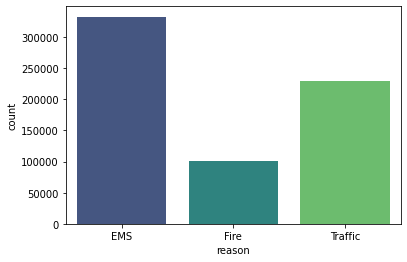

In [24]:
sns.countplot(x=df['reason'],palette='viridis')

## • Create Time-Related Columns

In [25]:
dtType = type(df['timeStamp'].iloc[0])
print("The data type of `timestamp` is {}.".format(dtType))

The data type of `timestamp` is <class 'str'>.


In [26]:
# Convert it to a Pandas date time data type
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
dtType = type(df['timeStamp'].iloc[0])
print("The data type of `timestamp` is now {}.".format(dtType))

The data type of `timestamp` is now <class 'pandas._libs.tslibs.timestamps.Timestamp'>.


## • Create an Hour Column

In [28]:
# Get an example to know how to convert it.
# Notice that the hours are in military 24 hours.
time = df['timeStamp'].iloc[0]
time.hour

17

In [32]:
# Make the Hour column
df['hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['hour'].head()

0    17
1    17
2    14
3    16
4    16
Name: hour, dtype: int64

## • Create Month and DayOfWeek Columns

In [34]:
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['dayOfWeek'] = df['timeStamp'].apply(lambda time: time.dayofweek)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,Month,dayOfWeek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3


## • Convert DayOfWeek to Readable Code

`map` is a Pandas method that [maps values of Series according to input correspondence](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html).

In [35]:
# Create a dateMap dictionary
dateMap = {
    0:'Mon',
    1:'Tue',
    2:'Wed',
    3:'Thu',
    4:'Fri',
    5:'Sat',
    6:'Sun'
}
df['dayOfWeek'] = df['dayOfWeek'].map(dateMap)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,Month,dayOfWeek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu


---
# Visualize Insights

## • Display Reasons Per Week

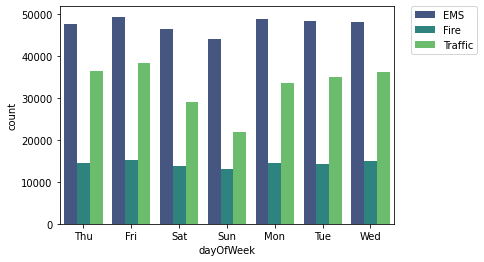

In [37]:
sns.countplot(x='dayOfWeek', data=df, hue='reason', palette='viridis')

# moves the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

## • Display Reasons Per Month

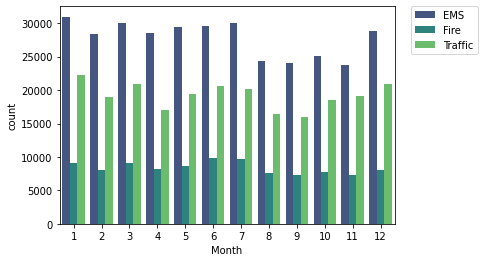

In [39]:
sns.countplot(x='Month', data=df, hue='reason', palette='viridis')

# moves the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)